In [1]:
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')
import time

import pandas as pd
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ROCAUC

# Load multi-class classification dataset
from deepforest import CascadeForestClassifier


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [3]:
# Load the dataset and split into train/test splits

# df = pd.read_csv('data/479.csv',sep=",") 
# del df['Unnamed: 0']

df=pd.read_csv('data/UNSW_2018_IoT_Botnet_Final_10_Best.csv',sep=";")  
del df['Unnamed: 0']
df.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,1,tcp,192.168.100.147,49960,192.168.100.7,80,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,1,DoS,HTTP
1,2,arp,192.168.100.7,-1,192.168.100.147,-1,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,1,DoS,HTTP
2,3,tcp,192.168.100.147,49962,192.168.100.7,80,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,1,DoS,HTTP
3,4,tcp,192.168.100.147,49964,192.168.100.7,80,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,1,DoS,HTTP
4,5,tcp,192.168.100.147,49966,192.168.100.7,80,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,1,DoS,HTTP


In [4]:
# 'attack','category','subcategory'
ten_best_features = df[['seq','stddev','N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max','category']]

In [5]:
pd.value_counts(df.category)

DDoS              1926624
DoS               1650260
Reconnaissance      91082
Normal                477
Theft                  79
Name: category, dtype: int64

In [6]:
classes = list(ten_best_features['category'].unique()) 
classes

['DoS', 'DDoS', 'Normal', 'Reconnaissance', 'Theft']

In [7]:
labels = ['seq','stddev','N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max']

In [8]:
# Load the dataset and split into train/test splits

ten_best_features = ten_best_features.values

y = ten_best_features[:,10]
X = ten_best_features[:,0:10]

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

# ROC AUC

In [10]:
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.model_selection import FeatureImportances
import multiprocessing

# Define the number of cores to use for parallel processing
n_jobs = multiprocessing.cpu_count()

--------------------------------------------
ROCAUC
--------------------------------------------
Training Time: 283.25 seconds
Prediction time : 48.70 seconds


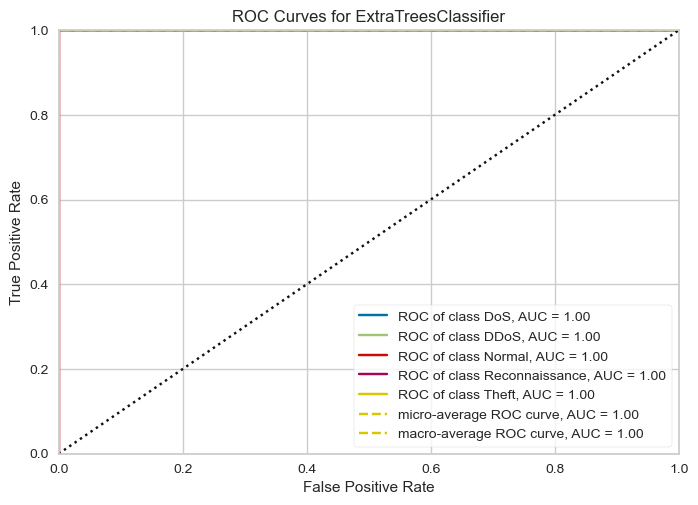

--------------------------------------------
confusion_matrix classification_report
--------------------------------------------
accuracy_score: 0.9999618375059175 ExtraTreesClassifier()
[[577968      5      0      1      0]
 [    16 495235      1      0      0]
 [     0      2    136      3      0]
 [     2      4      2  27158      0]
 [     0      2      2      2     18]]


                precision    recall  f1-score   support

          DDoS       1.00      1.00      1.00    577974
           DoS       1.00      1.00      1.00    495252
        Normal       0.96      0.96      0.96       141
Reconnaissance       1.00      1.00      1.00     27166
         Theft       1.00      0.75      0.86        24

      accuracy                           1.00   1100557
     macro avg       0.99      0.94      0.96   1100557
  weighted avg       1.00      1.00      1.00   1100557

--------------------------------------------
recall_curve_viz
--------------------------------------------


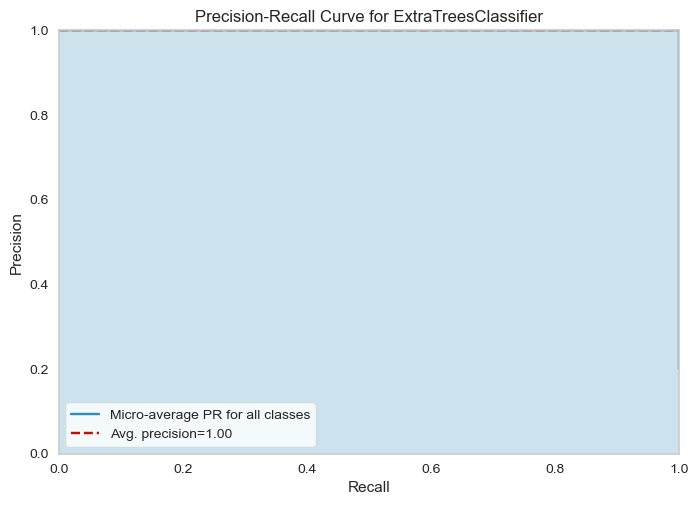

--------------------------------------------
PrecisionRecallCurve
--------------------------------------------


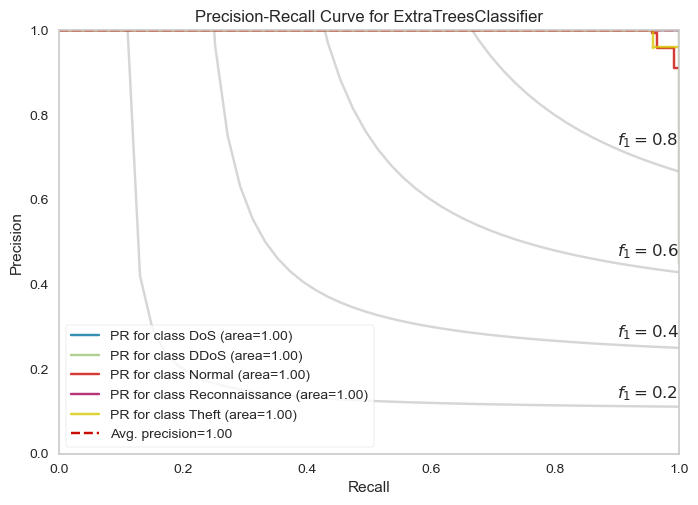

--------------------------------------------
ROCAUC
--------------------------------------------
Training Time: 622.55 seconds
Prediction time : 44.02 seconds


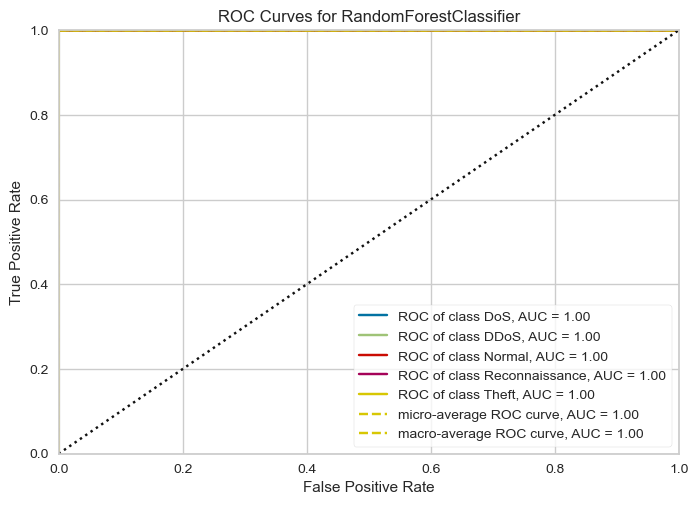

--------------------------------------------
confusion_matrix classification_report
--------------------------------------------
accuracy_score: 0.9999700151832208 RandomForestClassifier()
[[577969      5      0      0      0]
 [    14 495237      1      0      0]
 [     1      0    137      3      0]
 [     0      1      2  27163      0]
 [     0      0      1      5     18]]


                precision    recall  f1-score   support

          DDoS       1.00      1.00      1.00    577974
           DoS       1.00      1.00      1.00    495252
        Normal       0.97      0.97      0.97       141
Reconnaissance       1.00      1.00      1.00     27166
         Theft       1.00      0.75      0.86        24

      accuracy                           1.00   1100557
     macro avg       0.99      0.94      0.97   1100557
  weighted avg       1.00      1.00      1.00   1100557

--------------------------------------------
recall_curve_viz
--------------------------------------------


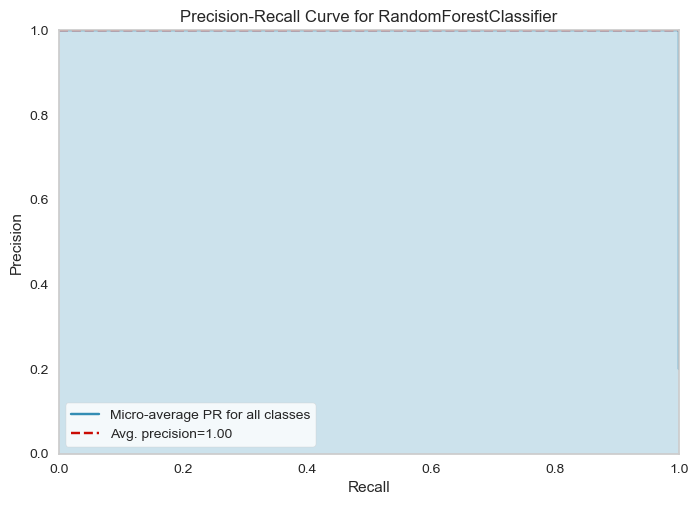

--------------------------------------------
PrecisionRecallCurve
--------------------------------------------


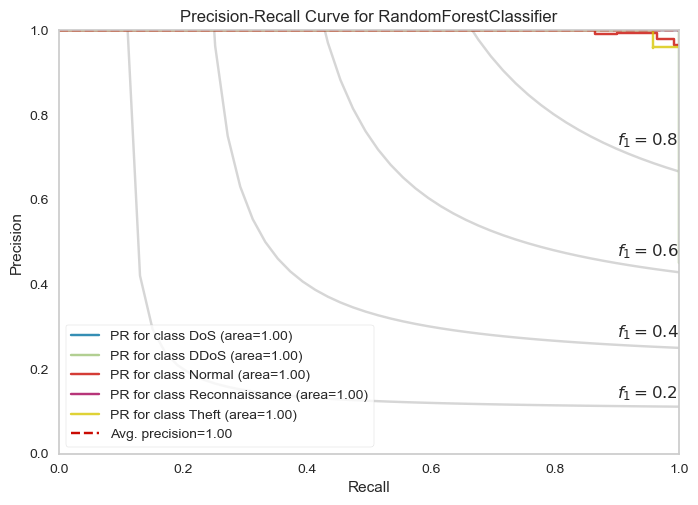

--------------------------------------------
ROCAUC
--------------------------------------------
Training Time: 1190.98 seconds
Prediction time : 16.06 seconds


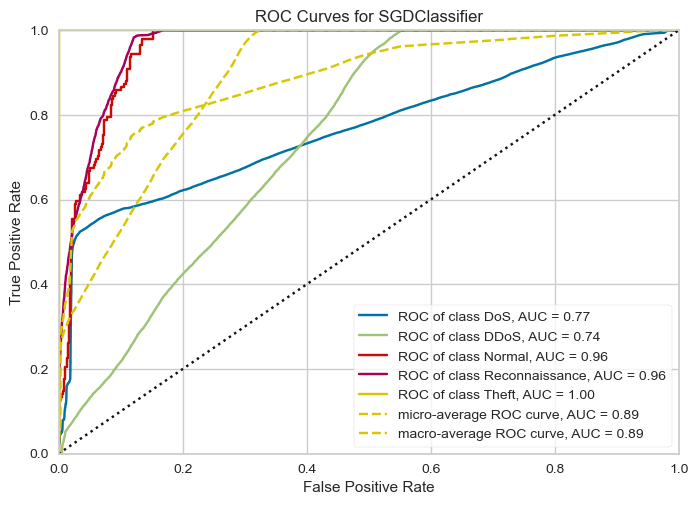

--------------------------------------------
confusion_matrix classification_report
--------------------------------------------
accuracy_score: 0.5475209371254738 SGDClassifier()
[[574135    715      0   3124      0]
 [460756  22223      0  12273      0]
 [    34     95      3      9      0]
 [ 18096   2853      0   6217      0]
 [     0     22      0      2      0]]


                precision    recall  f1-score   support

          DDoS       0.55      0.99      0.70    577974
           DoS       0.86      0.04      0.09    495252
        Normal       1.00      0.02      0.04       141
Reconnaissance       0.29      0.23      0.25     27166
         Theft       0.00      0.00      0.00        24

      accuracy                           0.55   1100557
     macro avg       0.54      0.26      0.22   1100557
  weighted avg       0.68      0.55      0.41   1100557

--------------------------------------------
recall_curve_viz
--------------------------------------------


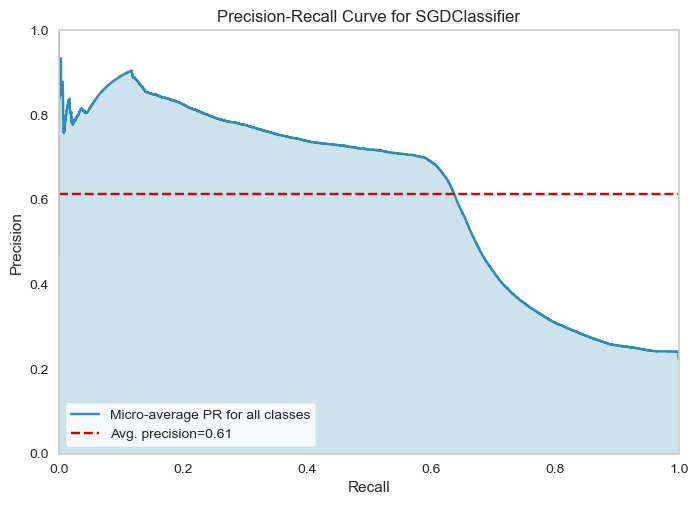

--------------------------------------------
PrecisionRecallCurve
--------------------------------------------


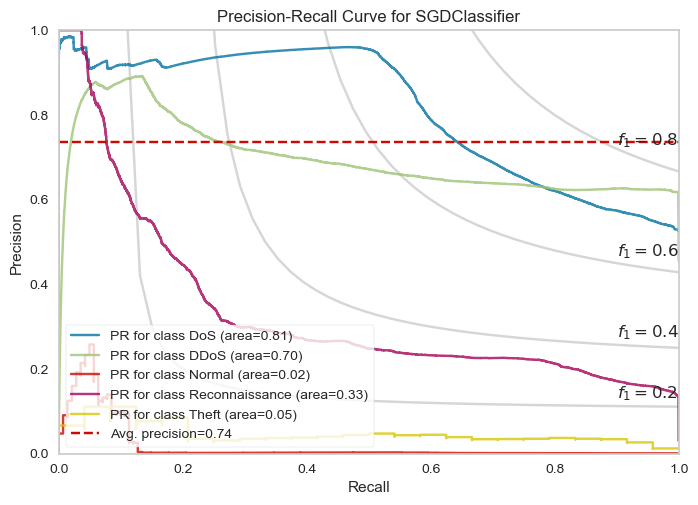

--------------------------------------------
ROCAUC
--------------------------------------------
[2023-01-15 18:17:54.531] Start to fit the model:
[2023-01-15 18:17:54.531] Fitting cascade layer = 0 
[2023-01-15 18:24:45.165] layer = 0  | Val Acc = 99.966 % | Elapsed = 410.633 s
[2023-01-15 18:24:51.018] Fitting cascade layer = 1 
[2023-01-15 18:29:10.991] layer = 1  | Val Acc = 99.965 % | Elapsed = 259.973 s
[2023-01-15 18:29:10.991] Early stopping counter: 1 out of 2
[2023-01-15 18:29:16.480] Fitting cascade layer = 2 
[2023-01-15 18:34:18.366] layer = 2  | Val Acc = 99.966 % | Elapsed = 301.885 s
[2023-01-15 18:34:18.366] Early stopping counter: 2 out of 2
[2023-01-15 18:34:18.366] Handling early stopping
[2023-01-15 18:34:18.443] The optimal number of layers: 1
Training Time: 1016.78 seconds
[2023-01-15 18:34:26.695] Start to evalute the model:
[2023-01-15 18:34:27.838] Evaluating cascade layer = 0 
[2023-01-15 18:35:04.725] Start to evalute the model:
[2023-01-15 18:35:05.879] Eva

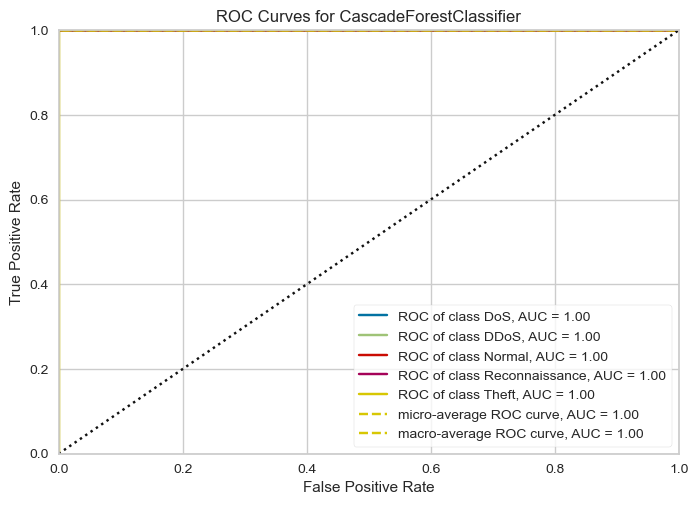

--------------------------------------------
confusion_matrix classification_report
--------------------------------------------
[2023-01-15 18:36:09.082] Start to evalute the model:
[2023-01-15 18:36:10.301] Evaluating cascade layer = 0 
accuracy_score: 0.999624735474855 CascadeForestClassifier(n_jobs=8)
[[577696    278      0      0      0]
 [   125 495126      1      0      0]
 [     1      1    137      2      0]
 [     0      0      1  27165      0]
 [     0      0      2      2     20]]


                precision    recall  f1-score   support

          DDoS       1.00      1.00      1.00    577974
           DoS       1.00      1.00      1.00    495252
        Normal       0.97      0.97      0.97       141
Reconnaissance       1.00      1.00      1.00     27166
         Theft       1.00      0.83      0.91        24

      accuracy                           1.00   1100557
     macro avg       0.99      0.96      0.98   1100557
  weighted avg       1.00      1.00      1.00   11

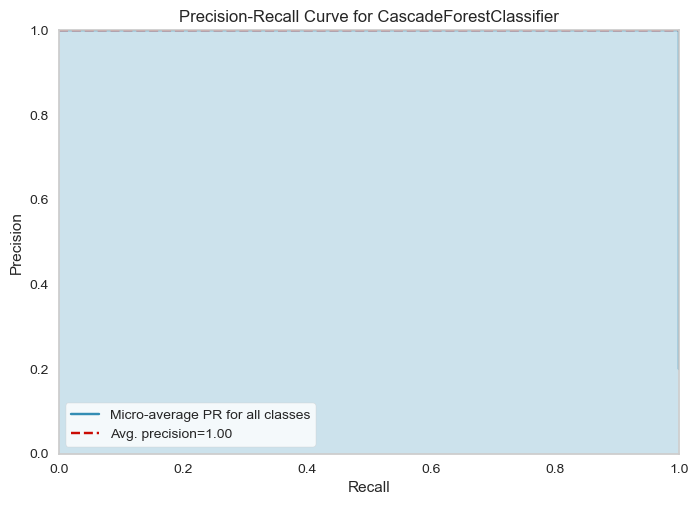

--------------------------------------------
PrecisionRecallCurve
--------------------------------------------
[2023-01-15 19:30:50.700] Start to fit the model:
[2023-01-15 19:30:50.700] Fitting cascade layer = 0 
[2023-01-15 19:34:55.929] layer = 0  | Val Acc = 99.964 % | Elapsed = 245.229 s
[2023-01-15 19:34:57.147] Fitting cascade layer = 1 
[2023-01-15 19:36:33.334] layer = 1  | Val Acc = 99.966 % | Elapsed = 96.187 s
[2023-01-15 19:36:34.468] Fitting cascade layer = 2 
[2023-01-15 19:38:28.621] layer = 2  | Val Acc = 99.983 % | Elapsed = 114.152 s
[2023-01-15 19:38:29.668] Fitting cascade layer = 3 
[2023-01-15 19:42:06.095] layer = 3  | Val Acc = 99.991 % | Elapsed = 216.427 s
[2023-01-15 19:42:07.247] Fitting cascade layer = 4 
[2023-01-15 19:45:50.762] layer = 4  | Val Acc = 99.991 % | Elapsed = 223.515 s
[2023-01-15 19:45:50.762] Early stopping counter: 1 out of 2
[2023-01-15 19:45:51.941] Fitting cascade layer = 5 
[2023-01-15 19:49:40.431] layer = 5  | Val Acc = 99.990 % | E

In [ ]:
models = [
    ExtraTreesClassifier(n_estimators=100),
    RandomForestClassifier(n_estimators=100),
    SGDClassifier(),
    CascadeForestClassifier(n_jobs=n_jobs) 
]

for model in models:
     
    # Instaniate the classification model and visualizer
    print("--------------------------------------------")
    print("ROCAUC")
    print("--------------------------------------------")
    visualizer = ROCAUC(model, classes=classes)
    # Start the timer
    start_time = time.time()
    visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
    # Stop the timer
    end_time = time.time()
    # Print the total time
    print("Training Time: {:.2f} seconds".format(end_time - start_time)) 
    
    # Start the timer
    start_time = time.time()
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
     # Stop the timer
    end_time = time.time()
    # Print the total time
    print("Prediction time : {:.2f} seconds".format(end_time - start_time))
    
    
    visualizer.show()                       # Finalize and render the figure
       
    
    print("--------------------------------------------")
    print("confusion_matrix classification_report")
    print("--------------------------------------------")
    
    predicted = visualizer.predict(X_test)
    print("accuracy_score:",format(accuracy_score(y_test, predicted)), model)
    print(confusion_matrix(y_test,predicted))
    print('\n')
    print(classification_report(y_test,predicted))
    
    print("--------------------------------------------")
    print("recall_curve_viz")
    print("--------------------------------------------")
    
    # recall_curve_viz : Create the visualizer, fit, score, and show it
    recall_curve_viz = precision_recall_curve(model, X_train, y_train, X_test, y_test)
    recall_curve_viz.show()

    print("--------------------------------------------")
    print("PrecisionRecallCurve")
    print("--------------------------------------------")
    
    # PrecisionRecallCurve : Create the visualizer, fit, score, and show it 
    viz = PrecisionRecallCurve(model,classes=classes,iso_f1_curves=True,per_class=True,micro=False)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()  